# SyriaTel Customer Churn Rate
### by Salome Grasland 

## Business Understanding
SyriaTel, a telecommunications company, has approached us to help understand why customers are churning. Churning is an industry term used for when a customer chooses to leave or unsubscribe to the services provided by the company. Using the dataset provided we will investigate patterns contributing to churn rate. 

### The Problem
Currently, SyriaTel has a churn rate of 14.5% customers annually. An average churn rate for a good company is 5 to 7%, which means there is room for improvement. 

### The Solution
Using classification machine learning models we will identify what features contribute to the churn rate. Our model will focus on:
What is the relationship between churn and other features?
Which features increase the likelihood of churn?
#### Metric to use: Recall
A common data science question is should this model be more focused with precision or recall. Precision measures how precise the predictions are while recall measures what percentage of the classes we’re focused on are actually being captured by the model. For this model of primary concern is false negatives– predicting a customer will not churn when they do. Hence, recall is a better metric for this dataset. It is more costly for the company to predict that a customer would stay when they actually churn. By using recall more customer retention strategies can be implemented. It is more beneficial for the company to misidentify someone as ‘churning’ and use a strategy to keep them engaged rather than missing one who will churn and applying retention measures to have them continue using the services. 


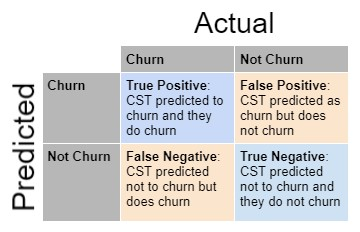

## Methodology
The process for conducting our research and modeling will follow the iterative OSEMiN pipeline. This entails obtaining, scrubbing, exploring, modeling, and interpreting the data. 

## Obtaining the Data

- Importing libraries needed
- Opening the Data

This dataset has: 
- 21 columns 
- 3333 entries 
- Categorical and Continous Data 


In [1]:
#Importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from scipy import stats
from math import log 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb 
from sklearn import svm
from sklearn.svm import SVC
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier, plot_importance

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#open dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [3]:
#getting data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Scrubbing the Data
- Manage datatypes
- Resolve missing/duplicate values.

This dataset was pretty clean. There were no missing values or duplicates. 

In [4]:
#checking null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
#dropping duplicate rows 
df.drop_duplicates()

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

## Exploring the Data
- Find patterns among the relationships of variables in the dataset.  

### Exploring the Dataset

In [6]:
# Check out spread of data and outliers
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### Exploring the Target variable: 'Churn'

From the countplot below we can see that our target varibale is imablanced, this means that we will need to use SMOTE later. 

0    2850
1     483
Name: churn, dtype: int64

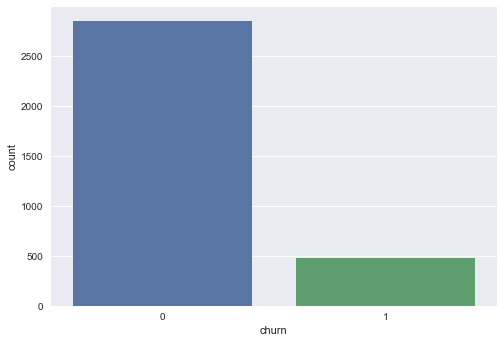

In [58]:
# Checking the balance of target variable 'churn'
sns.countplot(x='churn', data=df);
df['churn'].value_counts()

In [8]:
# Check for nonsensical or placeholder values
# We can see that DC is included at the 51st State
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n-----------------------------------------------\n')


state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

-----------------------------------------------

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Exploring Correlations

From this correlation map we can see that the charge columns are highly multicollinear with the minutes column. 

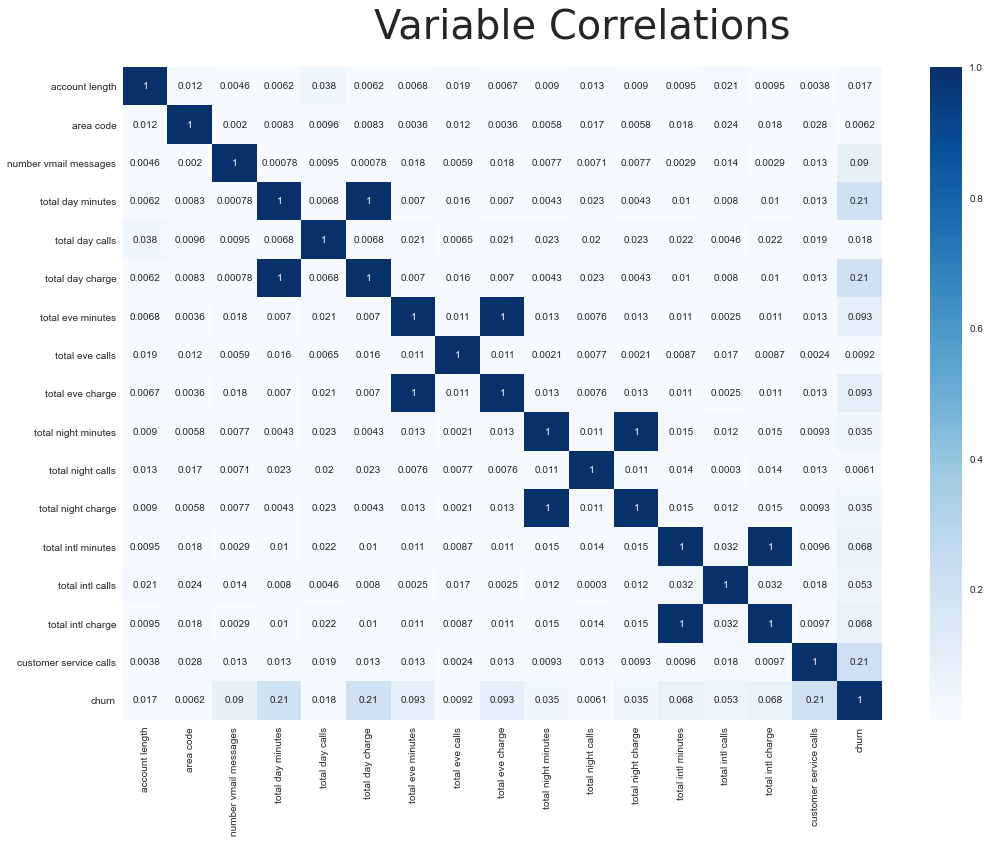

In [10]:
#checking variable correlations 
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

### Exploring categorical variables
From the pairplot we can see we have a few categorical variables:
- state
- international_plan
- voice_mail_plan
- churn

This will need to be enconded for modeling.

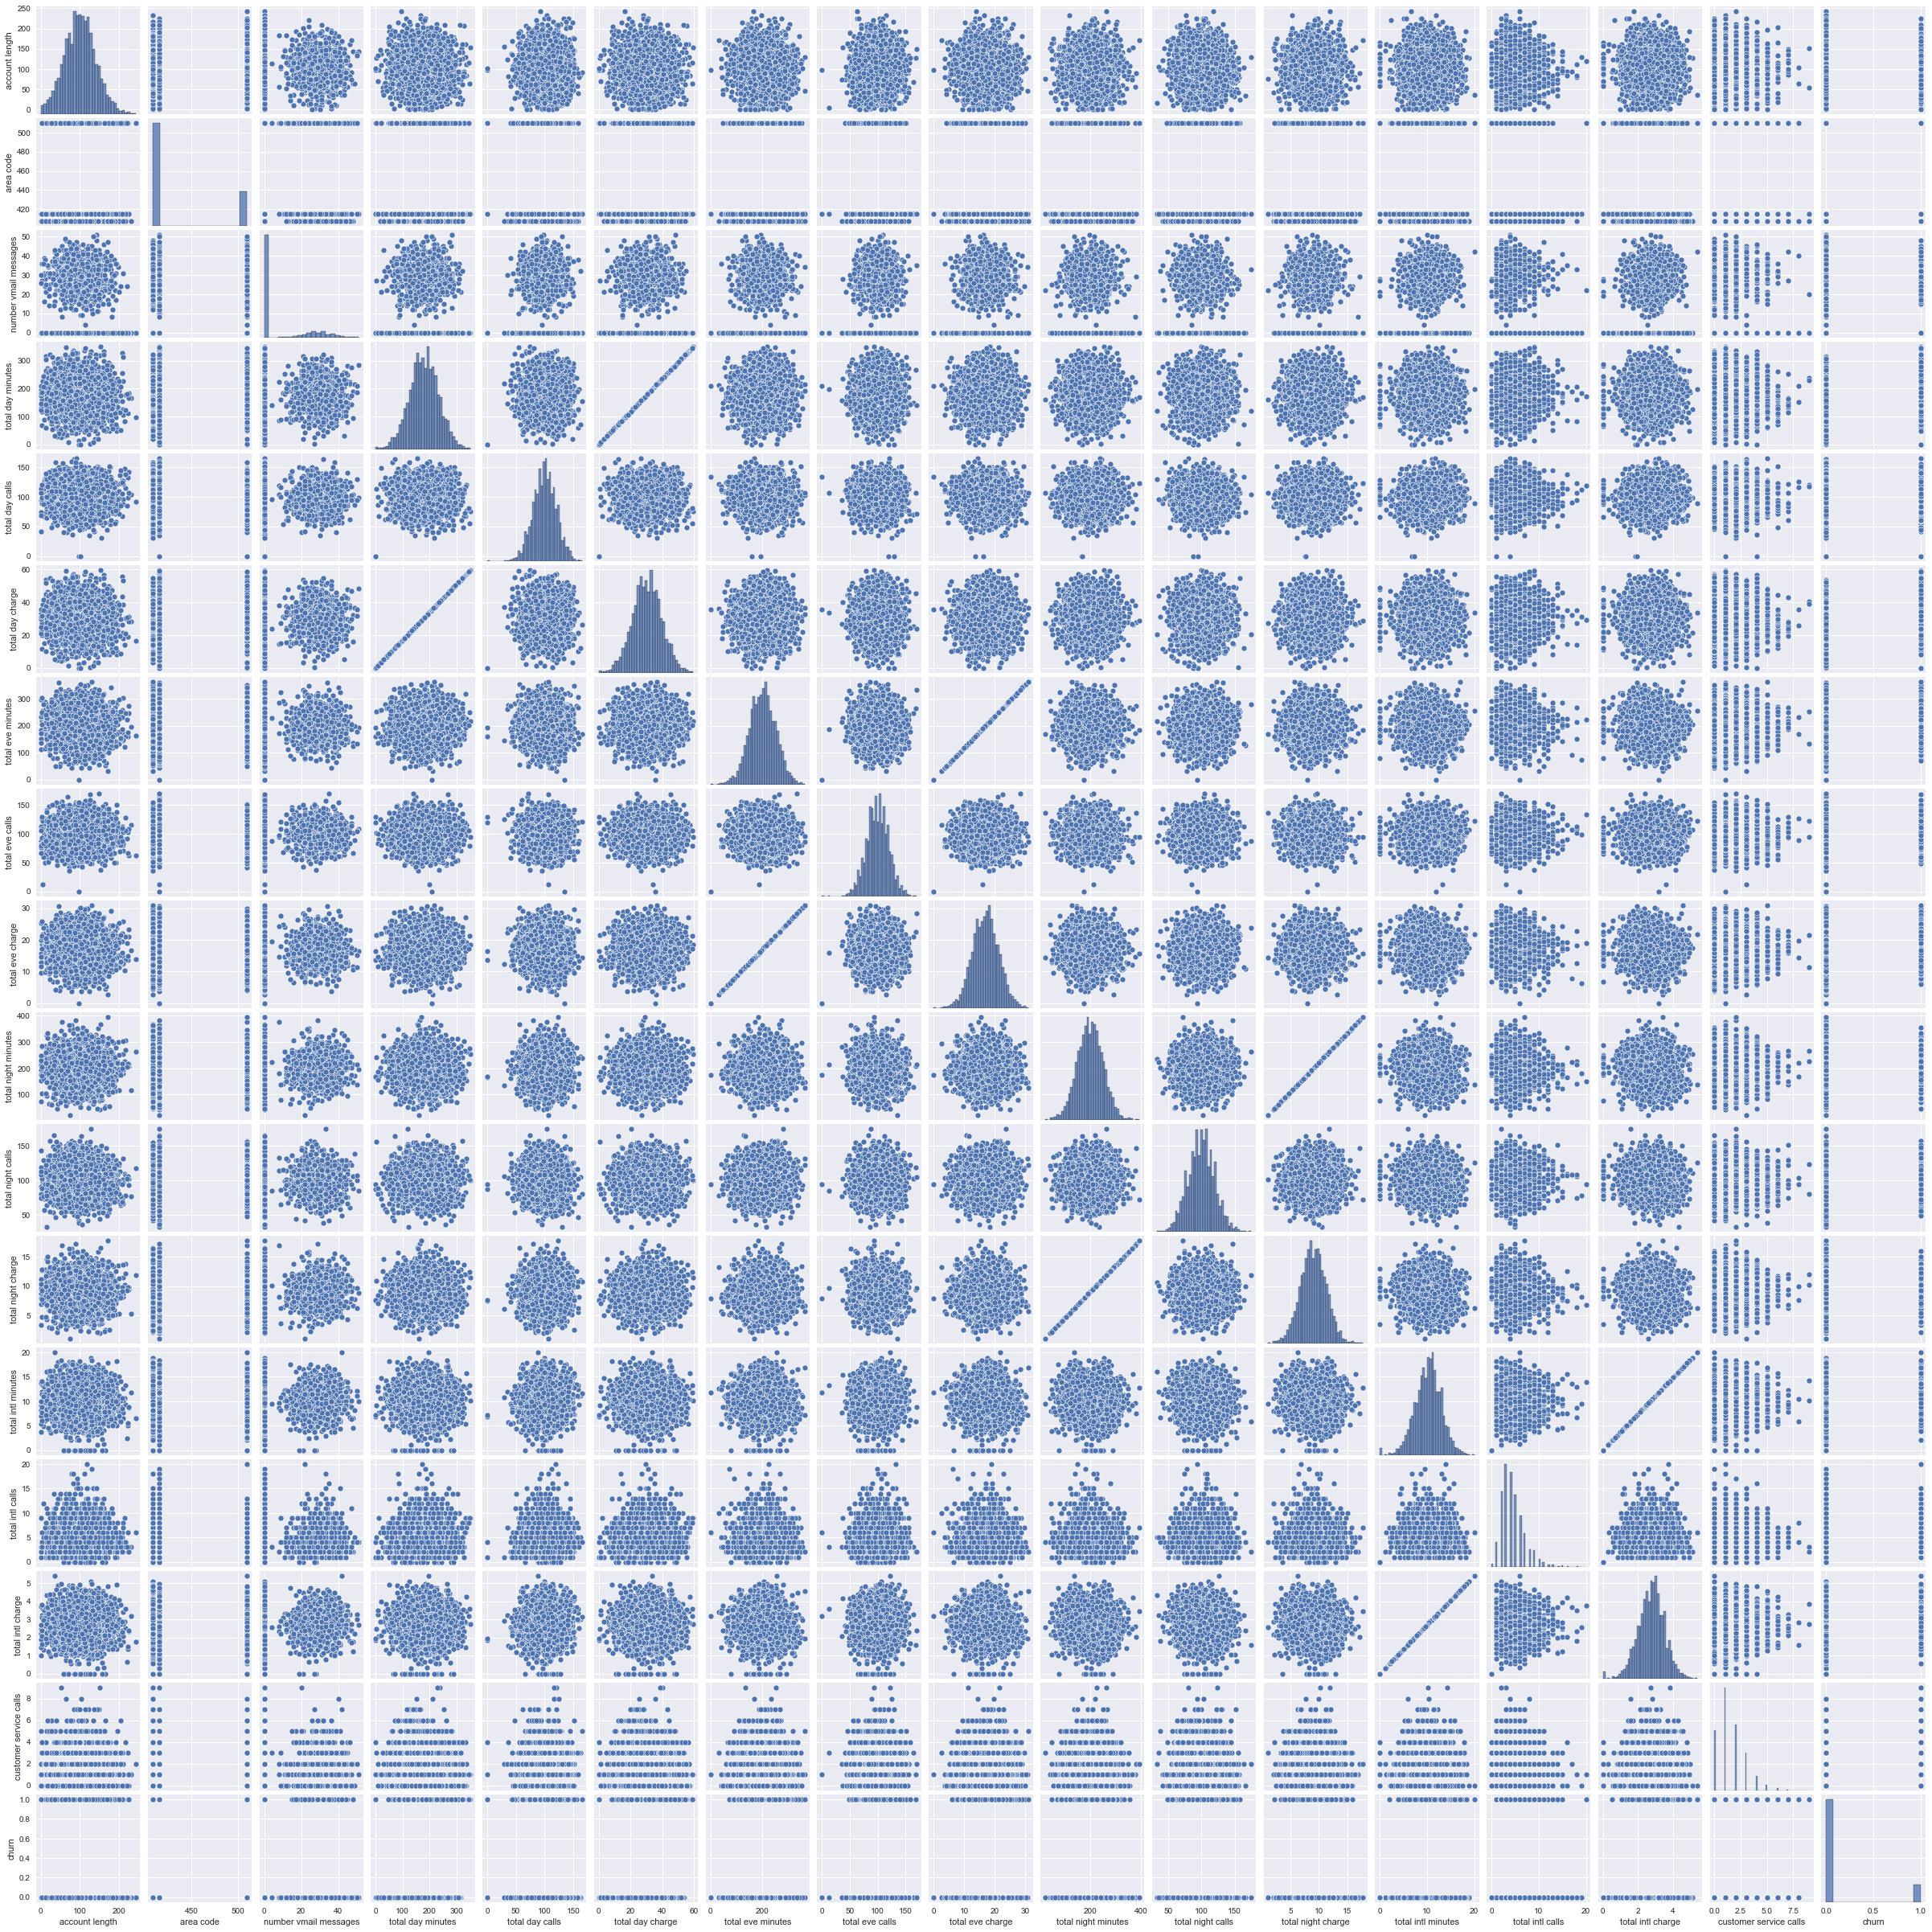

### Dropping unneccasary columns

For this project we are focused on the services and prices SyriaTel provides on the national level, so individual phone numbers and area codes are not necessary in this case. We also dropped the charge columns because they were multicollinear and added unnecessary noise to our dataset. 

In [11]:
#removing white space from column names 
df.columns = df.columns.str.replace(' ', '_')
#dropping charge columns 
df = df.drop([x for x in df.columns if x.endswith('_charge')],axis=1)
#dropping phone number because it is basically a Unique ID which we do not need for this data set 
df.drop('phone_number', axis=1, inplace=True)
df.drop('area_code', axis=1, inplace=True)
df.head()

state  account_length international_plan voice_mail_plan  \
0    KS             128                 no             yes   
1    OH             107                 no             yes   
2    NJ             137                 no              no   
3    OH              84                yes              no   
4    OK              75                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_eve_minutes  total_eve_calls  total_night_minutes  total_night_calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   total_intl_minutes  total_intl_calls  customer_service_calls  churn  
0                10.0                 3                       1  False  
1                13.7                 3                       1  False  
2                12.2                 5                       0  False  
3                 6.6                 7                       2  False  
4                10.1                 3                       3  False

### Converting categorical data

- state
- international_plan 
- voice_mail_plan 
- churn

We need to convert these so that we may intepret the data. 

In [12]:
#one hot encoding 'state'
origin = df['state']
origin_series = pd.Series(origin)
df['state'] = origin_series.astype('category')
df['state'] = df['state'].cat.codes

In [13]:
#Converting international_plan, voice_mail_plan, and churn to be 1 or 0 
#1= yes/true 0= no/false
df['international_plan'] = df['international_plan'].map(lambda x:1 if x == 'yes' else 0)
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x:1 if x == 'yes' else 0)
df['churn'] = df['churn'].map(lambda x:1 if x == True else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int8   
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_eve_minutes       3333 non-null   float64
 8   total_eve_calls         3333 non-null   int64  
 9   total_night_minutes     3333 non-null   float64
 10  total_night_calls       3333 non-null   int64  
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  customer_service_calls  3333 non-null   int64  
 14  churn                   3333 non-null   

In [14]:
#making a copy of the dataset for use in later analysis
df_cs = df.copy(deep=True)


## Modeling the Data
- Create baseline model 
- Iterate through different models 

### Define X and y

- Target variable (y): 'churn'
- Features (X): all othre columns

In [15]:
#Defining churn as our target (y)
#Defining the rest of the columns as our features (X)
y = df['churn']
X = df.drop(columns='churn', axis=1)

### Train Test Split 

In [16]:
#setting up our train/test split
#stratifying the data due to the large imablance in target classes 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56, stratify=y)
# Check size of train and test sets
print(len(X_train), len(X_test), len(y_train), len(y_test))

2499 834 2499 834


### Baseline Dummy Model 
We are creating a dummy model to serve as our baseline. This dummy model will pick most dominant class in our, in this case 'no churn' which occurs 85% of the time. This means the dummy model should have 85% accuracy. 

In [17]:
class Model_test():
    
    '''
    This class will be used to quickly test and save models for comparison
    This class was modified from lecture: Classifican Workflow - Flatiron School - Greg Damico
    
    '''
    
    def __init__(self, mod_name, model, X, y, run_cv=True):
        self.name = mod_name
        self.model = model
        self.X = X
        self.y = y
        #cross validation
        self.cv_result = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        
        if run_cv:
            self.cross_val()
        
    def cross_val(self, X=None, y=None, kfolds=5):
        '''
        Perform cross validation on the model.
        '''
        #checks to see if user entered other values for X,y
        cv_X = X if X else self.X 
        cv_y = y if y else self.y
        
        self.cv_results = cross_val_score(self.model,cv_X,cv_y,cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_std = np.std(self.cv_results)
        self.cv_median = np.median(self.cv_results)
    
        
    #display overall summary
    def print_summary(self):
        res_mean = round(self.cv_mean,4)
        res_std = round(self.cv_std,4)
        print('CV Results for {}\n {} +- {} accuracy'.format(self.name,res_mean,res_std))
        
        #print precision, recall, f1
        y_preds = self.model.predict(self.X)
        prec = precision_score(self.y,y_preds,zero_division='warn')
        rec = recall_score(self.y,y_preds,zero_division='warn') 
        f1s = f1_score(self.y,y_preds,zero_division='warn')
        
        print('\n\nPrecision:{}\tRecall:{}\tF1_Score:{}'.format(prec,rec,f1s))
        
        #plot roc_curve
        print('\nROC CURVE')
        plot_roc_curve(self.model, self.X, self.y)
        plt.show()
        
        #plot confusion matrix
        print('\nCONFUSION MATRIX')
        plot_confusion_matrix(self.model,self.X, self.y,cmap='YlGnBu')
        plt.show()
   #returns the models recall score.  This is our chosen metric.      
    def model_recall(self):
        y_preds = self.model.predict(self.X)
        return recall_score(self.y,y_preds,zero_division='warn') 
        
        

CV Results for Dummy Model
 0.8551 +- 0.0009 accuracy


Precision:0.0	Recall:0.0	F1_Score:0.0

ROC CURVE


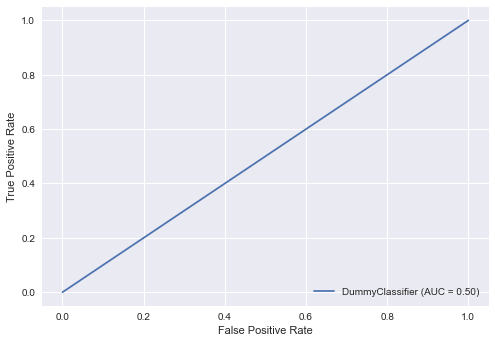


CONFUSION MATRIX


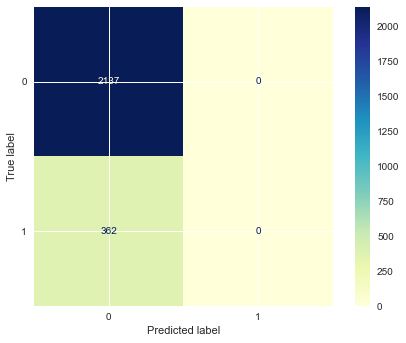

In [18]:
dm = DummyClassifier(strategy='most_frequent')
dm.fit(X_train, y_train)
dm_result = Model_test('Dummy Model', dm, X_train, y_train)
dm_result.print_summary()

The AUC-ROC curve for our baseline dummy model should be a diagnol line from 0.0 to 0.1, this is because our dummy model should be no better than a 50/50 guess. Any AUC-ROS curve above the baseline curve indicates that it is performing better than the baseline. 

In [19]:
dm_result.model_recall()

0.0

In [20]:
##create a dictionary to store results of tests
model_dict = {}
model_dict['baseline'] = dm_result.model_recall()
model_dict

{'baseline': 0.0}

#### Scaling the Data
The data is being standardized since the features in the dataset have different ranges. 

In [21]:
#Instantiate StandardScaler
scaler = StandardScaler()

#Transform X_train to scaled data set and fit the model with scaled X train data
scaled_X_train = scaler.fit_transform(X_train)

#Transform X_test to scaled data set
scaled_X_test= scaler.transform(X_test)

#Convert scaled data into a DataFrame
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

#### SMOTENC - Synthetic Minority Over-sampling Technique for Nominal and Continuous
From the above data we can see that there is a class imbalance in our target variable, 'churn', so we will use SMOTENC to synthesize data to level out the imbalance. Currently, we are 85% no churn and 15% churn.  We are using SMOTENC due to have binary columns. 



In [22]:

# Create instance of smotec
smote = SMOTENC(categorical_features=[0, 1, 2, 3], random_state=56)

# Create resampled version of the train dataset
resampled_X_train, resampled_y_train = smote.fit_resample(scaled_X_train, y_train)
# Create resampled version of the test dataset
resampled_X_test, resampled_y_test = smote.fit_resample(scaled_X_train, y_train)

In [23]:
#before smote
print('Before Smote\n', y_train.value_counts())

#after smote
print('\nAfter Smote\n', resampled_y_train.value_counts())

Before Smote
 0    2137
1     362
Name: churn, dtype: int64

After Smote
 1    2137
0    2137
Name: churn, dtype: int64


### Logistic Regression Model 

Now that we have our baseline model we can begin trying out different models. 

CV Results for Logistic Regression
 0.8487 +- 0.0075 accuracy


Precision:0.39344262295081966	Recall:0.06629834254143646	F1_Score:0.11347517730496454

ROC CURVE


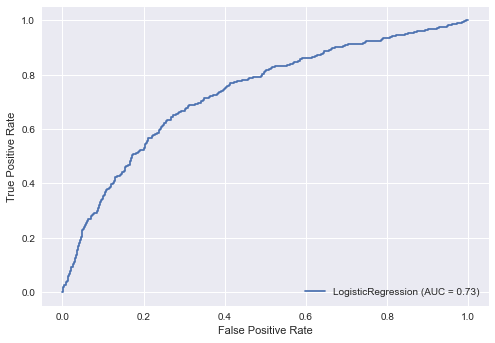


CONFUSION MATRIX


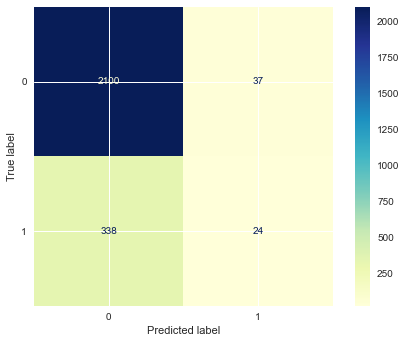

In [24]:
lr= LogisticRegression(random_state = 56)
lr.fit(X_train,y_train)
lr_result = Model_test('Logistic Regression', lr, X_train, y_train)
lr_result.print_summary()

In [25]:
model_dict['logistic regression'] = lr_result.model_recall()
model_dict

{'baseline': 0.0, 'logistic regression': 0.06629834254143646}

### Logistic Regression Model with resampled and standardized data

Let's run the logistic regression again on our resampled data. 

CV Results for Logistic Regression
 0.7651 +- 0.0145 accuracy


Precision:0.7634949679780421	Recall:0.7810014038371549	F1_Score:0.7721489706222531

ROC CURVE


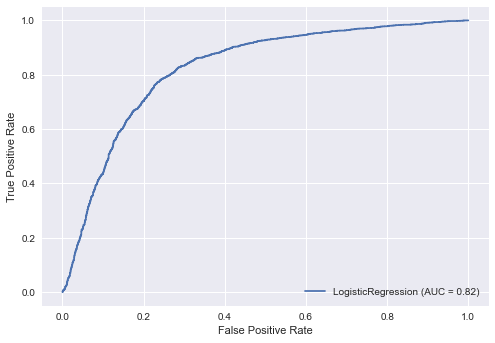


CONFUSION MATRIX


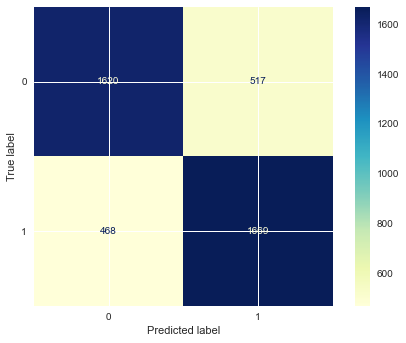

In [26]:
lr.fit(resampled_X_train, resampled_y_train)
lr_result_b = Model_test('Logistic Regression', lr, resampled_X_train, resampled_y_train)
lr_result_b.print_summary()

In [27]:
model_dict['logistic regression balanced'] = lr_result_b.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549}

By standardizing the data and dealing with our class imbalance using SMOTEC we can see the recall score has jumped tp 0.78. 

## Decision Tree

In [28]:
# Instantiate a DecisionTreeClassifier()
dt= DecisionTreeClassifier(max_depth=3, random_state=56)

CV Results for Decision Tree
 0.9032 +- 0.0145 accuracy


Precision:0.9030303030303031	Recall:0.4116022099447514	F1_Score:0.5654648956356737

ROC CURVE


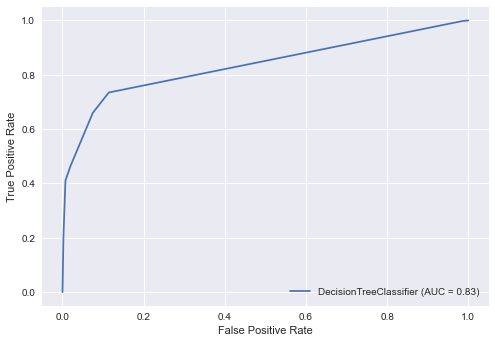


CONFUSION MATRIX


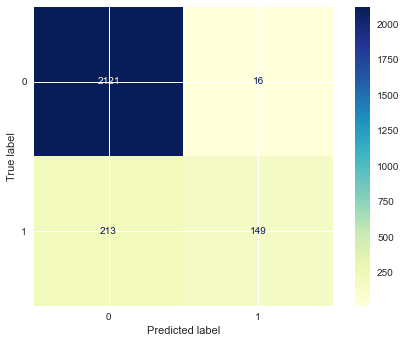

In [29]:
#running a decision tree on our imbalanced dataset
dt.fit(X_train, y_train)
dt_result= Model_test('Decision Tree', dt, X_train, y_train)
dt_result.print_summary()

In [30]:
#adding resuls to our recall dictionary
model_dict['decision tree'] = dt_result.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549,
 'decision tree': 0.4116022099447514}

CV Results for Decision Tree
 0.8383 +- 0.009 accuracy


Precision:0.8670694864048338	Recall:0.8058025269068788	F1_Score:0.8353140916808149

ROC CURVE


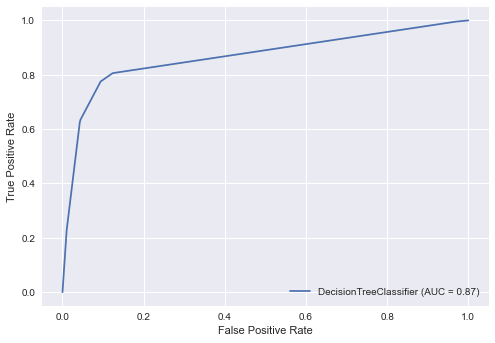


CONFUSION MATRIX


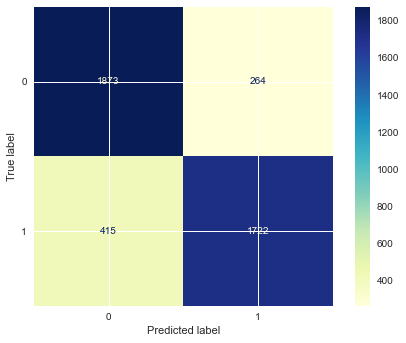

In [31]:
#running a decision tree on our balanced dataset
dt.fit(resampled_X_train, resampled_y_train)
dt_result_b= Model_test('Decision Tree', dt, resampled_X_train, resampled_y_train)
dt_result_b.print_summary()

In [32]:
#adding resuls to our recall dictionary
model_dict['decision tree balanced'] = dt_result_b.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549,
 'decision tree': 0.4116022099447514,
 'decision tree balanced': 0.8058025269068788}

## Random Forest

While our decision tree results were good they are prone to overfitting the data. Using a random forest model should help. Random Forest models help with overfitting by creating many trees. The ensemble of trees prevents the model from overfitting. 

In [33]:
rf = RandomForestClassifier(random_state =56)
#parameters for RandomForestClassifier
params={'min_samples_leaf':[1,5,10],
       'criterion':['gini','entropy'],
        'max_depth':[7,10,13]}
#create a GridSearchCV
gs=GridSearchCV(estimator=rf,param_grid=params,cv=10,scoring="recall")

CV Results for Random Forest
 0.6353 +- 0.0506 accuracy


Precision:1.0	Recall:0.930939226519337	F1_Score:0.9642346208869814

ROC CURVE


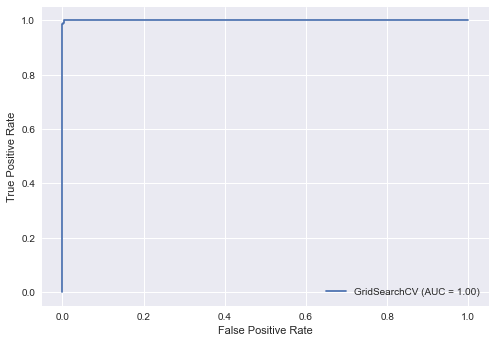


CONFUSION MATRIX


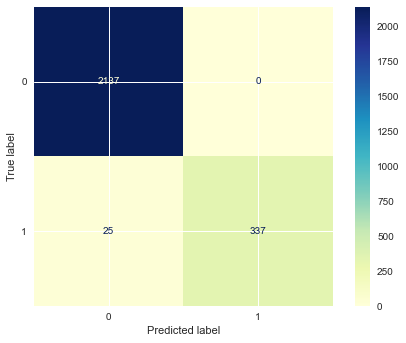

In [34]:
#running a Random Forest on our imbalanced dataset
gs.fit(X_train, y_train)
rf_result= Model_test('Random Forest', gs, X_train, y_train)
rf_result.print_summary()

In [35]:
#adding resuls to our recall dictionary
model_dict['random forest'] = rf_result.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549,
 'decision tree': 0.4116022099447514,
 'decision tree balanced': 0.8058025269068788,
 'random forest': 0.930939226519337}

CV Results for Random Forest
 0.9162 +- 0.0327 accuracy


Precision:0.9981078524124882	Recall:0.9873654656059897	F1_Score:0.9927075982121853

ROC CURVE


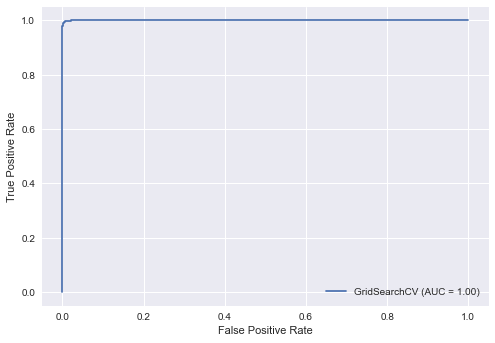


CONFUSION MATRIX


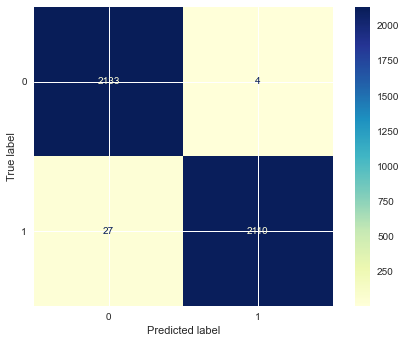

In [36]:
#running a random forest on our balanced dataset
gs.fit(resampled_X_train, resampled_y_train)
rf_result_b= Model_test('Random Forest', gs, resampled_X_train, resampled_y_train)
rf_result_b.print_summary()

In [37]:
#adding resuls to our recall dictionary
model_dict['random forest balanced'] = rf_result_b.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549,
 'decision tree': 0.4116022099447514,
 'decision tree balanced': 0.8058025269068788,
 'random forest': 0.930939226519337,
 'random forest balanced': 0.9873654656059897}

## XG Boost Model

In [38]:
#Running XG Boost model
#initiating 
xgb_clf_gs = xgb.XGBClassifier(random_state=56)

#hypertuning the model using GridSearch
xgb_grid = {
            'learning_rate': [0.01, 0.1, 0.5], 
            'gamma': [0, 0.01, 0.1], 
            'max_depth': [2, 5, 6, 10], 
            'min_child_weight': [0.1, 1, 10], 
            'subsample': [0.5, 0.7, 0.9], 
            'n_estimators': [5, 10, 20, 100]
           }

xgb_gridsearch = GridSearchCV(estimator=xgb_clf_gs, 
                              param_grid=xgb_grid, 
                              cv=5, 
                              return_train_score=True)

xgb_gridsearch.fit(resampled_X_train, resampled_y_train)

print('Best Parameters for Our XGBoost Model:')
xgb_gridsearch.best_params_

Best Parameters for Our XGBoost Model:


{'gamma': 0.01,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 0.1,
 'n_estimators': 100,
 'subsample': 0.7}

In [39]:
#Setting up classified with best parameters 
gs_xg = xgb.XGBClassifier(gamma=0.1, 
                               learning_rate=0.1, 
                               max_depth=10, 
                               min_child_weight=0.1, 
                               n_estimators=100, 
                               subsample=0.5, 
                               random_state=56)

CV Results for Random Forest
 0.6353 +- 0.0506 accuracy


Precision:0.13430127041742287	Recall:0.6132596685082873	F1_Score:0.22034739454094293

ROC CURVE


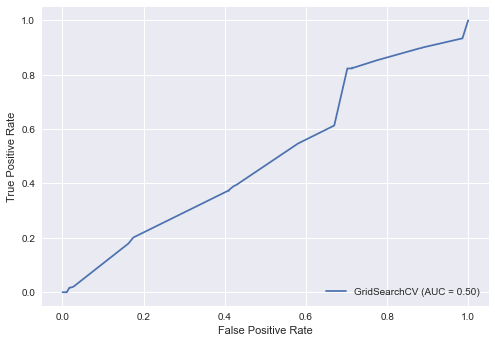


CONFUSION MATRIX


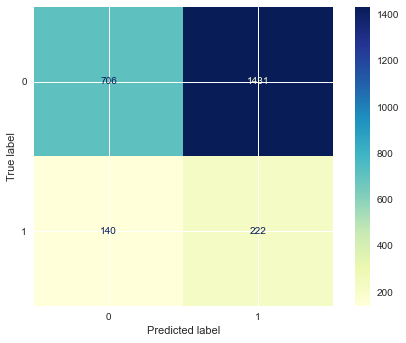

In [40]:
#running XG Boost Model on our imbalanced dataset
gs_xg.fit(X_train, y_train)
xg_result= Model_test('XG', gs_xg, X_train, y_train)
rf_result.print_summary()

In [41]:
#adding resuls to our recall dictionary
model_dict['XG'] = xg_result.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549,
 'decision tree': 0.4116022099447514,
 'decision tree balanced': 0.8058025269068788,
 'random forest': 0.930939226519337,
 'random forest balanced': 0.9873654656059897,
 'XG': 0.988950276243094}

CV Results for XG balanced
 0.9619 +- 0.0207 accuracy


Precision:1.0	Recall:0.9981282171268133	F1_Score:0.9990632318501171

ROC CURVE


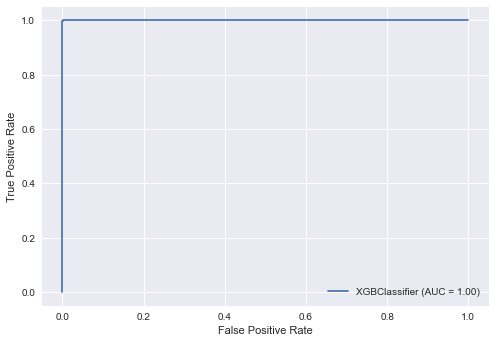


CONFUSION MATRIX


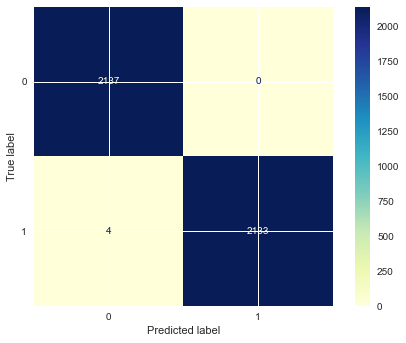

In [42]:
#running XG Boost on our resampled data 
gs_xg.fit(resampled_X_train, resampled_y_train)
xg_result_b= Model_test('XG balanced', gs_xg, resampled_X_train, resampled_y_train)
xg_result_b.print_summary()

In [43]:
#adding resuls to our recall dictionary
model_dict['XG balanced'] = xg_result_b.model_recall()
model_dict

{'baseline': 0.0,
 'logistic regression': 0.06629834254143646,
 'logistic regression balanced': 0.7810014038371549,
 'decision tree': 0.4116022099447514,
 'decision tree balanced': 0.8058025269068788,
 'random forest': 0.930939226519337,
 'random forest balanced': 0.9873654656059897,
 'XG': 0.988950276243094,
 'XG balanced': 0.9981282171268133}

### Model results:

As we can see from our model results our best performing model is our XG balanced model with a recall of 0.999.  


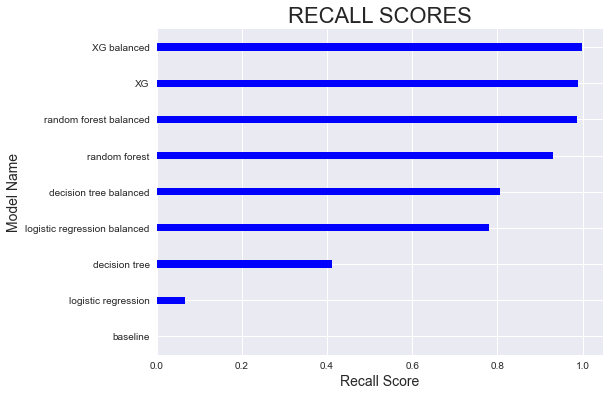

In [44]:
#sorting the recall results 
sorted_recall = sorted(model_dict.items(), key=lambda x:x[1])
sorted_model_dict = dict(sorted_recall)

#plot from model dict
values = sorted_model_dict.values()
models = [key for key in sorted_model_dict.keys()]
models

fig=plt.subplots(figsize=(8,6))
plt.barh(range(len(sorted_model_dict)), values, tick_label=models, color='blue', height=0.2)
plt.xlabel('Recall Score',fontsize =14)
plt.ylabel('Model Name', fontsize=14)
plt.title('RECALL SCORES', fontsize=22)
plt.show()


CV Results for XG balanced
 0.9619 +- 0.0207 accuracy


Precision:1.0	Recall:0.9981282171268133	F1_Score:0.9990632318501171

ROC CURVE


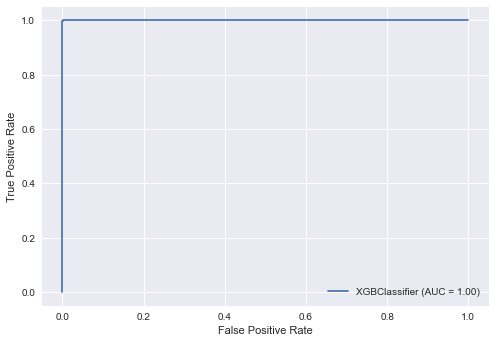


CONFUSION MATRIX


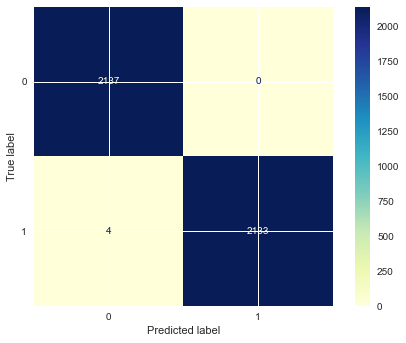

In [45]:
xg_result_b.print_summary()

### Final Model on Test Data

The final model is a hypertuned XG Boost Model using scaled and resampled data. It has a recall score of 0.99 and a precision score of 1, this is excellent because our precision did not suffer due to prioritizing recall. Our model was able to predict 2133 out of 2137 churns and did not mislabel any customers that did not leave. The train and test score were both 1 meaning that our model performs well on real world conditions. 


CV Results for XG balanced
 0.9619 +- 0.0207 accuracy


Precision:1.0	Recall:0.9981282171268133	F1_Score:0.9990632318501171

ROC CURVE


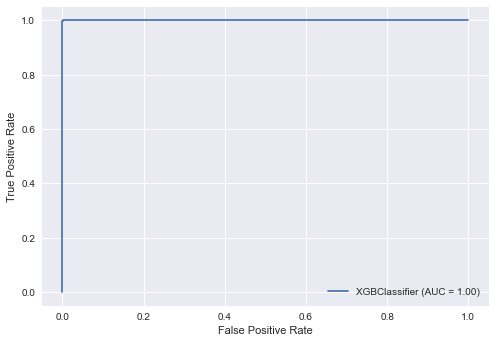


CONFUSION MATRIX


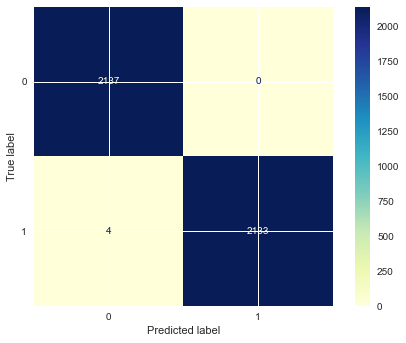

In [46]:
#running XG Boost on our resampled data 
gs_xg.fit(resampled_X_test, resampled_y_test)
xg_result_f= Model_test('XG balanced', gs_xg, resampled_X_test, resampled_y_test)
xg_result_f.print_summary()

In [47]:
# Fit the model
xgb_clf_gs.fit(resampled_X_train, resampled_y_train)

print('Train Score:', xgb_clf_gs.score(resampled_X_train, resampled_y_train))
print('Test Score:', xgb_clf_gs.score(resampled_X_test, resampled_y_test))

Train Score: 1.0
Test Score: 1.0


## Interpreting the Data
- Identify insights 
- Visualize findings

### Feature Importance on XG Model Boost

By using scikit learns feature importance we can see what variables most impacted customer churn rate. 

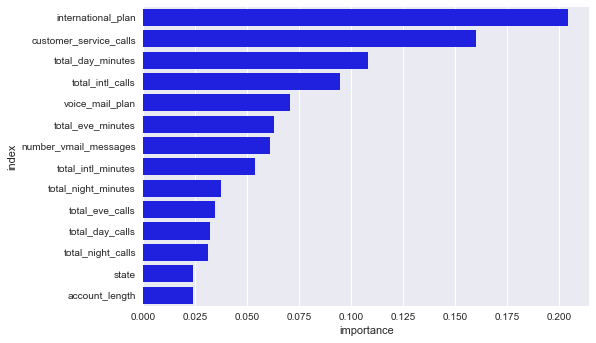

In [48]:
#Using feature importance 
feature_importances = gs_xg.feature_importances_

# Create a list of features: done
feature_list = list(resampled_X_train.columns)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)


result = relative_importances.reset_index().sort_values('importance',ascending=False)

#plot feature importances with sorted values
sns.barplot(x='importance', y="index", data=result, color='blue');

### Top Feature Visualization 

To help us understand how our most important feautres impact churn rates lets visualize them. The three features that had the highest impact on churn rate were:   
- ‘International_plan’: Does the customer have an international plan or not    
- ‘Customer_serivce_calls’: How many calls has the CST made to customer service   
- ‘Total_day_minutes’: How many minutes a day is this CST on the phone 





#### Churn by International Plan 
About half of the customers that have an international plan churned compared to about 20% of customers who did not have an international plan. 

In [49]:
#getting stats
ip_churn = df.groupby(['churn'])
ip_churn.agg({'international_plan': ['mean', 'min', 'max','std']})

international_plan                  
                    mean min max       std
churn                                     
0               0.065263   0   1  0.247033
1               0.283644   0   1  0.451233

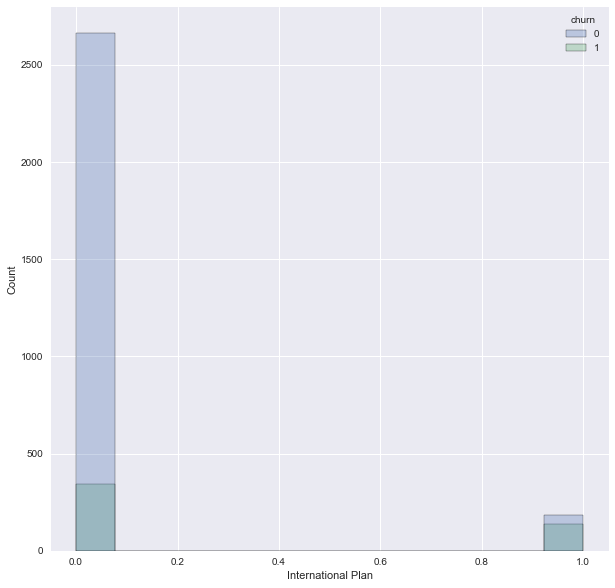

In [50]:
#plotting 
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df,x='international_plan', hue='churn', alpha=0.3)
ax.set(xlabel='International Plan', ylabel='Count')
plt.show()

#### Churn by Number of Customer Service Calls 
On average customers who churned made 2.2 customer service calls, with 4 calls being the point where more than half of customers churned. Perhaps in the future customers who are calling for the 3rd time can be channeled to more senior customer service agents. This kernel also looked at the most important features in regard to customer service calls and found that ‘international_plan’, ‘total_day_minutes”, and ‘total_intl_calls’ were the top 3 variables. It seems as if customers who need to use the companies international services are more likely to churn. The company should consider allocating more resources to their international plans in order to retain customers. 

In [51]:
#getting stats
cs_churn = df.groupby(['churn'])
cs_churn.agg({'customer_service_calls': ['mean', 'min', 'max','std']})

customer_service_calls                  
                        mean min max       std
churn                                         
0                   1.449825   0   8  1.163883
1                   2.229814   0   9  1.853275

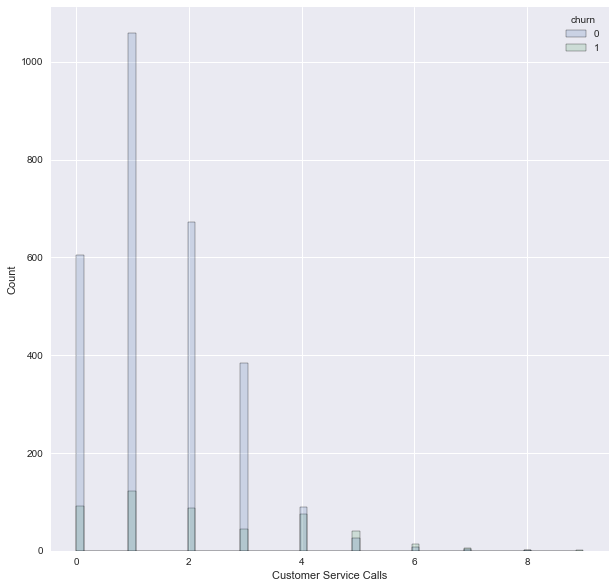

In [52]:
#plotting 
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df,x='customer_service_calls', hue='churn',alpha=0.2)
ax.set(xlabel='Customer Service Calls', ylabel='Count')

plt.show()

In [53]:
#enconding customer service calls 
#if CST has received more than 3 calls = 1 else = 0 
df_cs['customer_service_calls'] = df_cs['customer_service_calls'].map(lambda x:1 if x < 4 else 0)
df_cs.head()

state  account_length  international_plan  voice_mail_plan  \
0     16             128                   0                1   
1     35             107                   0                1   
2     31             137                   0                0   
3     35              84                   1                0   
4     36              75                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_eve_minutes  total_eve_calls  total_night_minutes  total_night_calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   total_intl_minutes  total_intl_calls  customer_service_calls  churn  
0                10.0                 3                       1      0  
1                13.7                 3                       1      0  
2                12.2                 5                       1      0  
3                 6.6                 7                       1      0  
4                10.1                 3                       1      0

In [54]:
#setting customer serivce calls as the target variable 
y_cs = df_cs['customer_service_calls']
X_cs = df_cs.drop(columns='customer_service_calls', axis=1)
X_train_cs, X_test_cs, y_train_cs, y_test_cs = train_test_split(X_cs, y_cs, stratify=y_cs, random_state=42)

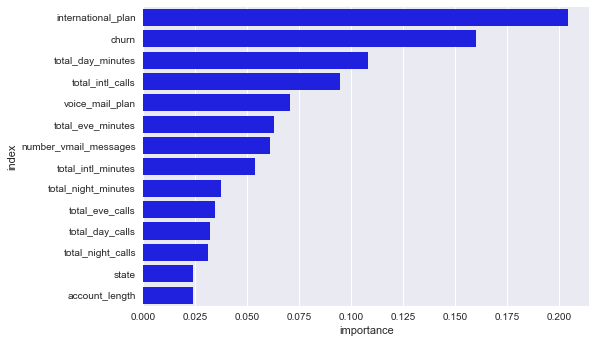

In [55]:
#seeing what features are most important to customer service calls 
#Using feature importance 
feature_importances = gs_xg.feature_importances_

# Create a list of features: done
feature_list = list(X_cs.columns)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)


result = relative_importances.reset_index().sort_values('importance',ascending=False)

#plot feature importances with sorted values
sns.barplot(x='importance', y="index", data=result, color='blue');

#### Churn by Total Day Minutes

After about 275 total day minutes churn becomes dominant. 

In [56]:
#getting stats
ic_churn = df.groupby(['churn'])
ic_churn.agg({'total_day_minutes': ['mean', 'min', 'max','std']})

total_day_minutes                       
                   mean  min    max        std
churn                                         
0            175.175754  0.0  315.6  50.181655
1            206.914079  0.0  350.8  68.997792

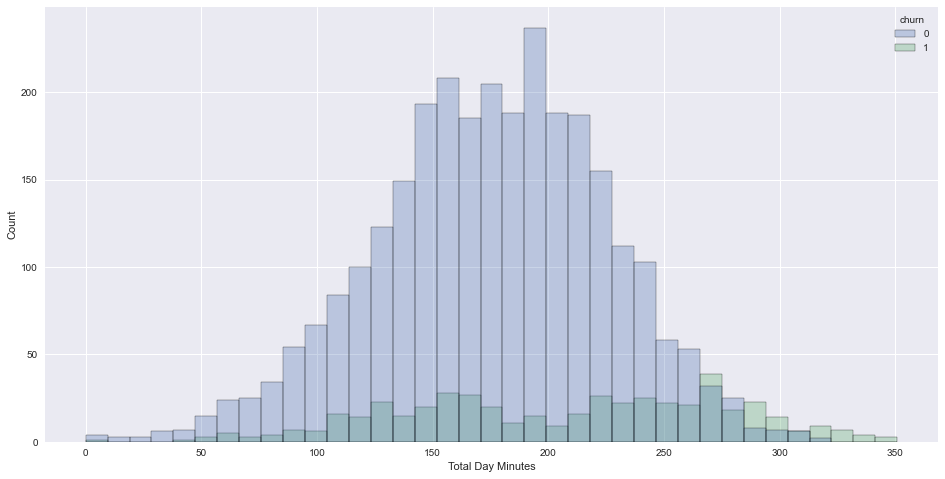

In [57]:
#plotting 
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.histplot(data=df,x='total_day_minutes', hue='churn', alpha=0.3)
ax.set(xlabel='Total Day Minutes', ylabel='Count')
plt.show()

## Conclusion and Further Work 

Our model was able to predict 2133 out of 2137 churns and did not mislabel any customers that did not leave. Using the model to identify customers that will churn can help SyriaTel reach their churn rate of 5 to 7%. 



### Recommendations 
The recommendation we make to SyriaTel is:
- Create an international team, whose focus is dealing with customers using international plans 
- Incentivize resolving calls in 1 to 2 calls 
- Funnel customers calling in for the 3rd time to senior agents who can provide the best help 
- Audit high use customers 
- Improve customer service training on international services

### Further Work
SyriaTel could benefit from collecting not just state by state data, but also country by country data. It would be interesting to see if international plans being used in certain countries are more likely to churn. SyriaTel could then allocate funds based on countries that generate the most profits for international plans. SyriaTel could also look at countries that have high churn rates to see what competitors offer that SyriaTel does not. 


## For More Information
For additional info, contact Salome Grasland at salome.grasland@ncf.edu

## Repository Structure

├── README.md <- The top-level README for reviewers of this project     
├── Phase 3 Notebook.ipynb <- Narrative documentation of analysis in Jupyter notebook      
├── Phase 3 Project Presentation.pdf <- PDF version of project presentation     
├── data <- Both sourced externally and generated from code      
└── images <- Both sourced externally and generated from code      